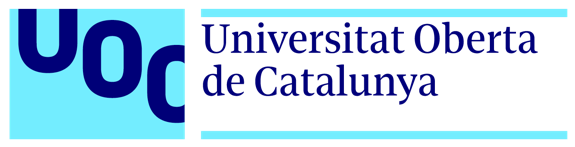

# TFM - Aprendizaje automático para la predicción del riesgo individual de cáncer de mama dentro del programa de cribado. Comparativa frente a modelo estadístico.

1. Carga de los datos

2. Descripción de las variables

3. Análisis básico de los datos

4. Otras visualizaciones

In [1]:
# Librerías de manipulación de datos
import pandas as pd
import numpy as np

# Librerías de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerLine2D

import warnings
warnings.filterwarnings('ignore')

# 1. Carga de los datos

In [2]:
# Carga de los datos
data = pd.read_csv("../data/DataBase.dat", delim_whitespace = True)

# Muestra de las primersa cinco muestras
data.head(5)

,ID,Episode_ID,Age,Time1,Time2,Timetotal,Family_History,BBD_History,Mammographic_Features,BreastCancer
0,1,1,56,",00","2,23","13,96",0,0,0,0
1,1,2,58,"2,23","4,01","13,96",0,1,0,0
2,1,3,60,"4,01","5,95","13,96",0,1,0,0
3,1,4,62,"5,95","7,98","13,96",0,1,0,0
4,1,5,64,"7,98","10,13","13,96",0,1,0,0


# 2. Descripción de las variables

Descripción de las variables que conforman el dataset:


- `ID`: variable identificativa para cada mujer
- `Episode_ID`: identificador asociado al episodio (mamografía) de cada mujer, ordenados cronológicamente
- `Age`: edad de la mujer
- `Time1`: Tiempo de inicio del episodio, momento en el que se hace la mamografía.
- `Time2`: Tiempo final del episodio, ventana de tiempo en la que se observa a la mujer con esas características.
- `Timetotal`: Tiempo de observación total de la mujer desde la primera mamografía hasta fin de seguimiento.
- `Family_History`: historia familiar de antecedentes de cáncer de mama (familiar de primer grado)
    - 0: No hay antecedentes
    - 1: Si
- `BBD_History`: antecedentes personales de lesión benigna
    - 0: Ninguno
    - 1: Biopsia previa, histología desconocida (reportada por la propio mujer a traves de cuestionario)
    - 2: Biopsia previa, tipo no proliferativa (confirmada histológicamente, reportada durante cribado)
    - 3: Biopsia previa, tipo proliferativa (confirmada histológicamente, reportada durante cribado)
- `Mammographic_Features`: antecedentes personales de patrones mamográficos (reportados por un radiólogo en mamografías anteriores)
    - 0: Ninguna
    - 1: Masa
    - 2: Calcificaciones
    - 3: Densidad asimétrica
    - 4: Distorsión
    - 5: Patrón múltipla
- `BreastCancer`:
    - 0: No
    - 1: Si

## 2.2 Transformación de los datos

In [3]:
df = data
df = df.drop(["ID"], axis = 1)
df[df["Time1"] == ",00"]["Time1"] = "0"
df["Time1"] = data["Time1"].str.replace(",",".")
df["Time1"] = df["Time1"].astype(str).astype(float).astype(int)
df["Time2"] = data["Time2"].str.replace(",",".")
df["Time2"] = df["Time2"].astype(str).astype(float).astype(int)
df["Timetotal"] = data["Timetotal"].str.replace(",",".")
df["Timetotal"] = df["Timetotal"].astype(str).astype(float).astype(int)
df["Episode_ID"] = df["Episode_ID"].astype("category")
df["Age"] = df["Age"].astype(float)
df["Family_History"] = df["Family_History"].astype("category")
df["BBD_History"] = df["BBD_History"].astype("category")
df["Mammographic_Features"] = df["Mammographic_Features"].astype("category")
df["BreastCancer"] = df["BreastCancer"].astype("category")

# 3. Análisis básico de los datos

## 3.1 Análisis de la composición de las variables

In [4]:
print("El set de datos tiene " + str(data.shape[0]) + " muestras")
print("El set de datos tiene " + str(data.shape[1]) + " variables")

El set de datos tiene 437540 muestras
El set de datos tiene 10 variables


In [5]:
# Se agrupan por ID las mujeres
df_total = data.groupby(['ID']).agg(list)
df_cancer_free = data[data['BreastCancer'] == 0].groupby(['ID']).agg(list)
df_cancer = data[data['BreastCancer'] == 1].groupby(['ID']).agg(list)

In [6]:
print("Las muestras del dataset pertenecen a " + str(df_total.shape[0]) + " mujeres")
print("El dataset está formado " + str(df_cancer_free.shape[0]) + " mujeres que no han desarrollado cáncer de mama")
print("El dataset está formado " + str(df_cancer.shape[0]) + " mujeres que sí han desarrollado cáncer de mama")

Las muestras del dataset pertenecen a 121969 mujeres
El dataset está formado 119911 mujeres que no han desarrollado cáncer de mama
El dataset está formado 2058 mujeres que sí han desarrollado cáncer de mama


In [7]:
df_mean_total = data.groupby(["ID"]).mean()
df_mean_cancer_free = data[data['BreastCancer'] == 0].groupby(["ID"]).mean()
df_mean_cancer = data[data['BreastCancer'] == 1].groupby(["ID"]).mean()

In [8]:
print("La edad media del total de mujeres del dataset es: "
      "{:.2f}".format(df_mean_total.describe()["Age"]["mean"]))
print("La edad media de las mujeres que no han desarrollado cáncer de mama es: "
      "{:.2f}".format(df_mean_cancer_free.describe()["Age"]["mean"]))
print("La edad media de las mujeres que sí han desarrollado cáncer de mama es: "
      "{:.2f}".format(df_mean_cancer.describe()["Age"]["mean"]))

La edad media del total de mujeres del dataset es: 58.24
La edad media de las mujeres que no han desarrollado cáncer de mama es: 58.27
La edad media de las mujeres que sí han desarrollado cáncer de mama es: 56.76


In [9]:
print("Media de episodios del total de mujeres del dataset "
      "{:.2f}".format(df_mean_total.describe()["Episode_ID"]["mean"]))
print("Media de episodios de las mujeres que no han desarrollado cáncer de mama: "
      "{:.2f}".format(df_mean_cancer_free.describe()["Episode_ID"]["mean"]))
print("Media de episodios de las mujeres que han desarrollado cáncer de mama: "
      "{:.2f}".format(df_mean_cancer.describe()["Episode_ID"]["mean"]))

Media de episodios del total de mujeres del dataset2.29
Media de episodios de las mujeres que no han desarrollado cáncer de mama: 2.30
Media de episodios de las mujeres que han desarrollado cáncer de mama: 1.97


## 3.2 Análisis del tipo de variables

### 3.2.1 Variables numéricas

In [10]:
# Análisis descriptivo
df.drop(["Episode_ID", "Family_History", "BBD_History", "Mammographic_Features", "BreastCancer"], axis = 1).describe()

,Age,Time1,Time2,Timetotal
count,437540.000000,437540.000000,437540.000000,437540.000000
mean,59.013820,3.793034,5.795004,9.871321
std,5.486056,3.818791,3.932821,4.447056
min,50.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,2.000000,6.000000
50%,59.000000,3.000000,5.000000,10.000000
75%,64.000000,6.000000,8.000000,13.000000
max,69.000000,18.000000,20.000000,20.000000


[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


Text(0.5, 1.0, 'Timetotal')

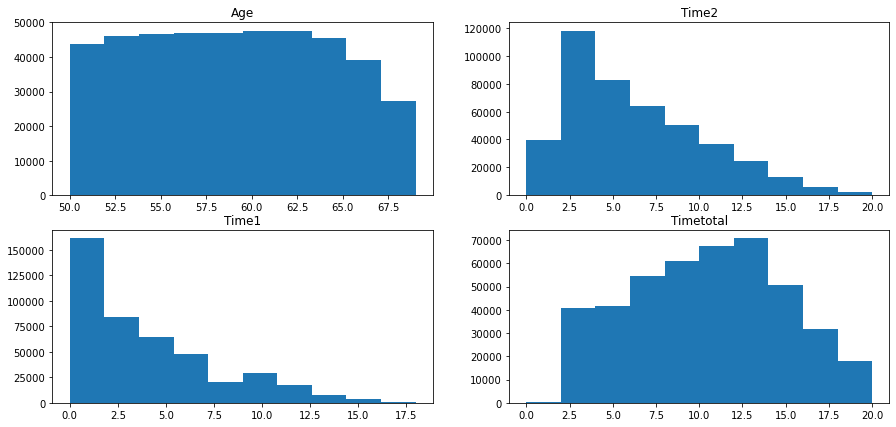

In [11]:
# Histogramas
fig, ax = plt.subplots(2, 2, figsize = (15, 7))
print(ax)
ax[0, 0].hist(df["Age"])
ax[1, 0].hist(df["Time1"])
ax[0, 1].hist(df["Time2"])
ax[1, 1].hist(df["Timetotal"])


ax[0, 0].set_title("Age")
ax[1, 0].set_title("Time1")
ax[0, 1].set_title("Time2")
ax[1, 1].set_title("Timetotal")

### 3.2.2 Variables categóricas

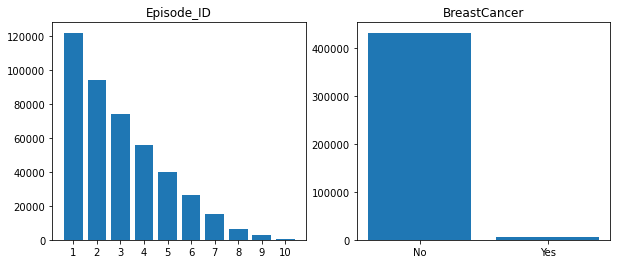

In [12]:
features = data[["Episode_ID", "BreastCancer"]].columns

fig, axis = plt.subplots(1, len(features), figsize=(10, 4))
for feature, ax in zip(features, axis):
    freq = data[feature].value_counts()
    ax.bar(freq.index.values, freq)
    ax.set_title(feature)
    
    if (feature == "Episode_ID"):
        ax.set_xticks(freq.index.values, ("1", "2", "3", "4", "5", "6", "7", "8", "9", "10"))
    else:
        ax.set_xticks(freq.index.values, ("No", "Yes"))

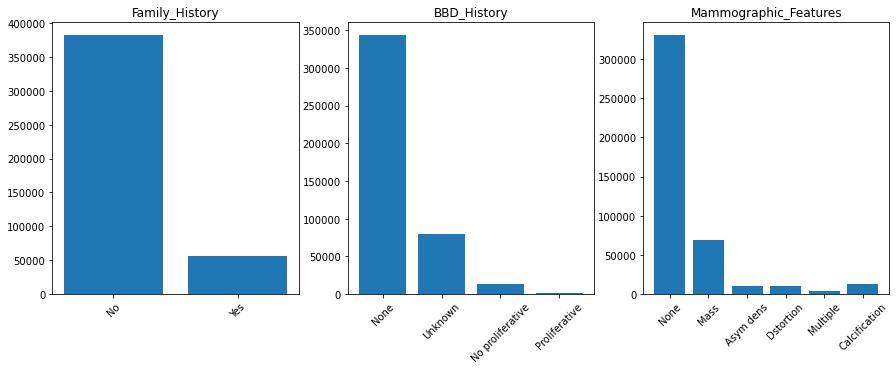

In [13]:
features = data[["Family_History", "BBD_History", "Mammographic_Features"]].columns

fig, axis = plt.subplots(1, len(features), figsize=(15, 5))
for feature, ax in zip(features, axis):
    freq = data[feature].value_counts()
    ax.bar(freq.index.values, freq)
    ax.set_title(feature)
    
    if (feature == "BBD_History"):
        ax.set_xticks(freq.index.values, ("None", "Unknown", "No proliferative", "Proliferative"), rotation=45)
    elif (feature == "Mammographic_Features"):
        ax.set_xticks(freq.index.values, ("None", "Mass", "Calcification", "Asym dens", "Dstortion", "Multiple"),
                     rotation=45)
    else:
        ax.set_xticks(freq.index.values, ("No", "Yes"), rotation=45)

### 3.3.3 Correlación variables numéricas

<AxesSubplot:>

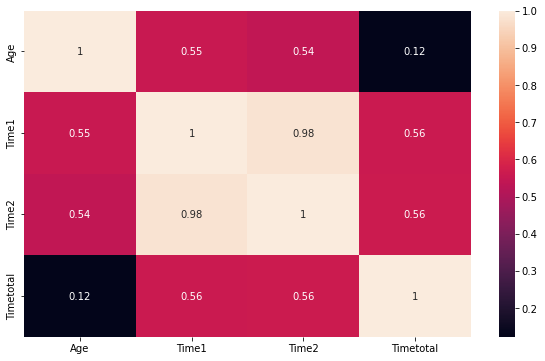

In [14]:
# Función de correlación
cor = df.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)

### 3.3.4 Relación entre variable dependiente e independientes

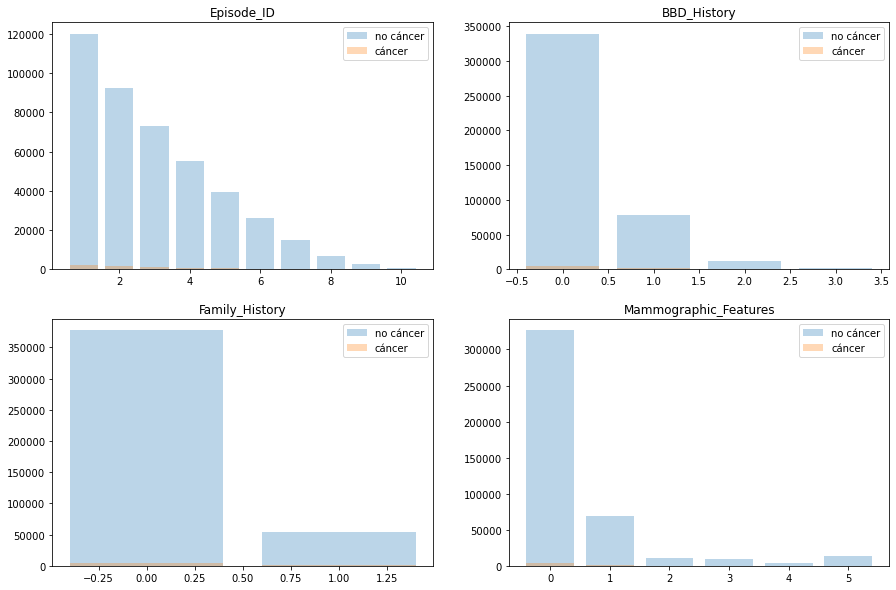

In [15]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

ax[0, 0].bar(data[data['BreastCancer'] == 0]['Episode_ID'].value_counts().index, 
          data[data['BreastCancer'] == 0]['Episode_ID'].value_counts(), alpha=0.3, label='no cáncer')
ax[0, 0].bar(data[data['BreastCancer'] == 1]['Episode_ID'].value_counts().index, 
          data[data['BreastCancer'] == 1]['Episode_ID'].value_counts(), alpha=0.3, label='cáncer')
ax[1, 0].bar(data[data['BreastCancer'] == 0]['Family_History'].value_counts().index, 
          data[data['BreastCancer'] == 0]['Family_History'].value_counts(), alpha=0.3, label='no cáncer')
ax[1, 0].bar(data[data['BreastCancer'] == 1]['Family_History'].value_counts().index, 
          data[data['BreastCancer'] == 1]['Family_History'].value_counts(), alpha=0.3, label='cáncer')
ax[0, 1].bar(data[data['BreastCancer'] == 0]['BBD_History'].value_counts().index, 
          data[data['BreastCancer'] == 0]['BBD_History'].value_counts(), alpha=0.3, label='no cáncer')
ax[0, 1].bar(data[data['BreastCancer'] == 1]['BBD_History'].value_counts().index, 
          data[data['BreastCancer'] == 1]['BBD_History'].value_counts(), alpha=0.3, label='cáncer')
ax[1, 1].bar(data[data['BreastCancer'] == 0]['Mammographic_Features'].value_counts().index, 
          data[data['BreastCancer'] == 0]['Mammographic_Features'].value_counts(), alpha=0.3, label='no cáncer')
ax[1, 1].bar(data[data['BreastCancer'] == 1]['Mammographic_Features'].value_counts().index, 
          data[data['BreastCancer'] == 1]['Mammographic_Features'].value_counts(), alpha=0.3, label='cáncer')

ax[0, 0].set_title('Episode_ID')
ax[1, 0].set_title('Family_History')
ax[0, 1].set_title('BBD_History')
ax[1, 1].set_title('Mammographic_Features')

ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

plt.show()

# 4. Otras visualizaciones

Para las siguientes visualizaciones se ha tomado como referencia el último episodio de cada mujer

In [16]:
df = data

df = df.groupby(['ID']).agg(list)

df_np = df.to_numpy()
 
def parseRows(row):
    patient_length = len(row[0])
    parsed_row = [x[patient_length - 1] for x in row]
    return parsed_row
    
parsed_np = np.apply_along_axis(parseRows, axis = 1, arr = df_np)

df_converted = pd.DataFrame(parsed_np, columns = ['episode','age','time1', 'time2', 'time_total', 'family_history',
                                                 'bbd_history', 'mammographic_features', 'breast_cancer'])

df_converted = df_converted.drop(['time1', 'time2'], axis = 1)

df_converted.head(10)

,episode,age,time_total,family_history,bbd_history,mammographic_features,breast_cancer
0,7,68,"13,96",0,1,0,0
1,3,67,"5,73",0,1,0,0
2,2,61,"4,03",0,0,0,0
3,5,68,"9,87",0,0,0,0
4,6,61,"12,15",0,1,0,0
5,6,61,"11,93",0,1,1,0
6,4,67,"7,97",1,0,0,0
7,6,61,"12,15",1,0,0,0
8,6,61,"12,16",0,0,0,0
9,4,61,"10,15",0,1,0,0


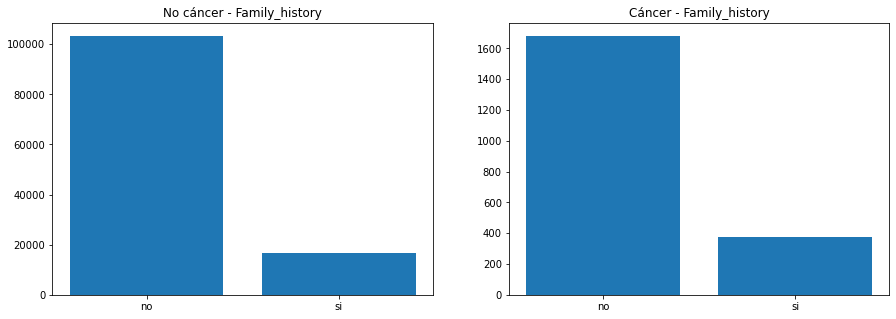

<Figure size 432x288 with 0 Axes>

In [17]:
# Comparativa Family_History mujere sin cáncer, Family_History mujeres con cáncer
freq_negative = df_converted[df_converted['breast_cancer'] == '0']['family_history'].value_counts()
freq_positive = df_converted[df_converted['breast_cancer'] == '1']['family_history'].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(freq_negative.index.values, freq_negative)
ax[1].bar(freq_positive.index.values, freq_positive)

ax[0].set_xticks(freq_negative.index.values, ('no', 'si'))
ax[1].set_xticks(freq_positive.index.values, ('no', 'si'))

ax[0].set_title('No cáncer - Family_history')
ax[1].set_title('Cáncer - Family_history')

plt.show()
plt.savefig('../plots/family_history_comparative.png')

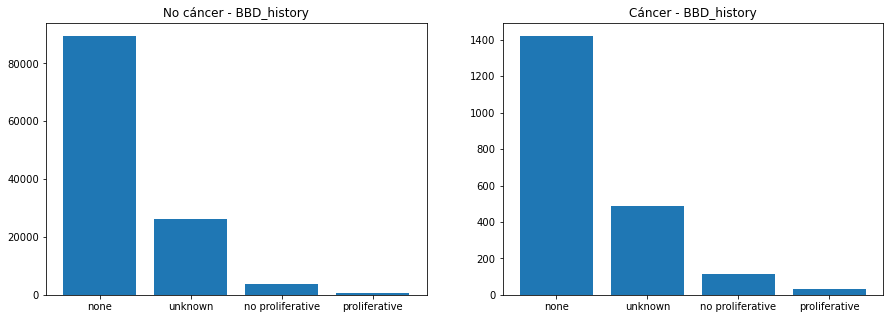

<Figure size 432x288 with 0 Axes>

In [18]:
# Comparativa BBD_History mujere sin cáncer, BBD_History mujeres con cáncer
freq_negative = df_converted[df_converted['breast_cancer'] == '0']['bbd_history'].value_counts()
freq_positive = df_converted[df_converted['breast_cancer'] == '1']['bbd_history'].value_counts()

# freq = df_converted['breast_cancer'].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(freq_negative.index.values, freq_negative)
ax[1].bar(freq_positive.index.values, freq_positive)

ax[0].set_xticks(freq_negative.index.values, ('none', 'unknown', 'no proliferative', 'proliferative'))
ax[1].set_xticks(freq_positive.index.values, ('none', 'unknown', 'no proliferative', 'proliferative'))

ax[0].set_title('No cáncer - BBD_history')
ax[1].set_title('Cáncer - BBD_history')

plt.show()
plt.savefig('../plots/bbd_history_comparative.png')

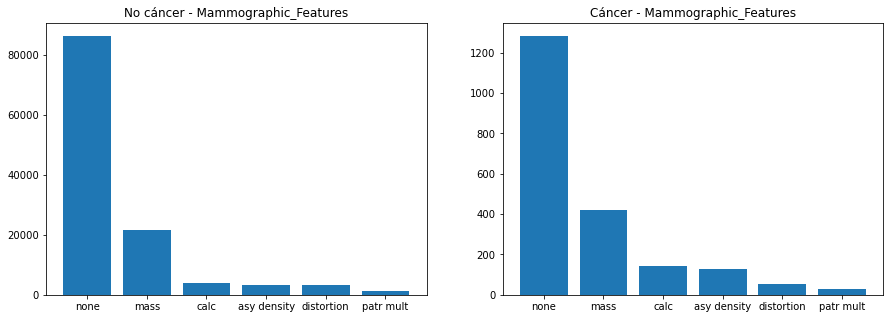

<Figure size 432x288 with 0 Axes>

In [19]:
# Comparativa Mammographic_Features mujere sin cáncer, Mammographic_Features mujeres con cáncer
freq_negative = df_converted[df_converted['breast_cancer'] == '0']['mammographic_features'].value_counts()
freq_positive = df_converted[df_converted['breast_cancer'] == '1']['mammographic_features'].value_counts()

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].bar(freq_negative.index.values, freq_negative)
ax[1].bar(freq_positive.index.values, freq_positive)

ax[0].set_xticks(freq_negative.index.values, ('none', 'mass', 'calc',
                                              'asy density', 'distortion', 'patr mult'))
ax[1].set_xticks(freq_positive.index.values, ('none', 'mass', 'calc',
                                              'asy density', 'distortion', 'patr mult'))

ax[0].set_title('No cáncer - Mammographic_Features')
ax[1].set_title('Cáncer - Mammographic_Features')

plt.show()
plt.savefig('../plots/mammographic_features_comparative.png')